# **Admission Chance**

# **Data Preparation Stage**

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read data
df = pd.read_csv("Admission Chance.csv")
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# define target and features
y = df['Chance of Admit ']
X = df.drop(['Serial No','Chance of Admit '],axis=1)

# **Model Selection Stage**

In [4]:
# split into train and test sample
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=2529)

In [5]:
# select model
from sklearn.tree import DecisionTreeRegressor,plot_tree
dtr=DecisionTreeRegressor(max_depth=3, random_state=2529)

In [6]:
# train model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=2529)

In [7]:
# evaluate the model on training sample
dtr.score(X_train,y_train)

0.7738322816632399

In [8]:
# cross validate model on train sample
from sklearn.model_selection import cross_validate
cross_validate(dtr, X_train, y_train, cv=5)

{'fit_time': array([0.00339293, 0.00291228, 0.00212002, 0.00471592, 0.00208259]),
 'score_time': array([0.00510216, 0.00300527, 0.        , 0.00199342, 0.00095415]),
 'test_score': array([0.62738225, 0.74911799, 0.55230282, 0.8131547 , 0.7219827 ])}

In [9]:
# evaluate the model on the test sample
dtr.score(X_test,y_test)

0.7533283237506997

# **Model Validation Stage**

In [10]:
# model hyperparameters
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2529,
 'splitter': 'best'}

In [11]:
# hyperparameters selection
params = {'model__max_depth' : [2,3,4,5,6,7,8, 9, 10],
        'model__criterion' : ['squared_error', 'absolute_error'],
        'model__random_state' : [2529]}

In [12]:
# import pipeline
from sklearn.pipeline import Pipeline

In [13]:
# define pipe line
pipe = Pipeline([('model', dtr)])

In [14]:
# grid search cv
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe,params,cv=5)

In [15]:
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [16]:
# train grid search
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(max_depth=3,
                                                              random_state=2529))]),
             param_grid={'model__criterion': ['squared_error',
                                              'absolute_error'],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__random_state': [2529]})

In [17]:
# find best parama
grid.best_params_

{'model__criterion': 'squared_error',
 'model__max_depth': 3,
 'model__random_state': 2529}

In [18]:
# select best estimator
best = grid.best_estimator_

In [19]:
# fit best estimator
best.fit(X_train,y_train)

Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=3, random_state=2529))])

In [20]:
# predict with best estimator
y_pred=best.predict(X_test)

In [21]:
# model error
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [22]:
# mean absolute error
mean_absolute_error(y_test,y_pred)

0.057160452637289014

In [23]:
# mean absolute percentage error
mean_absolute_percentage_error(y_test,y_pred)

0.09720961265635472

In [24]:
# r square
r2_score(y_test,y_pred)

0.7533283237506997

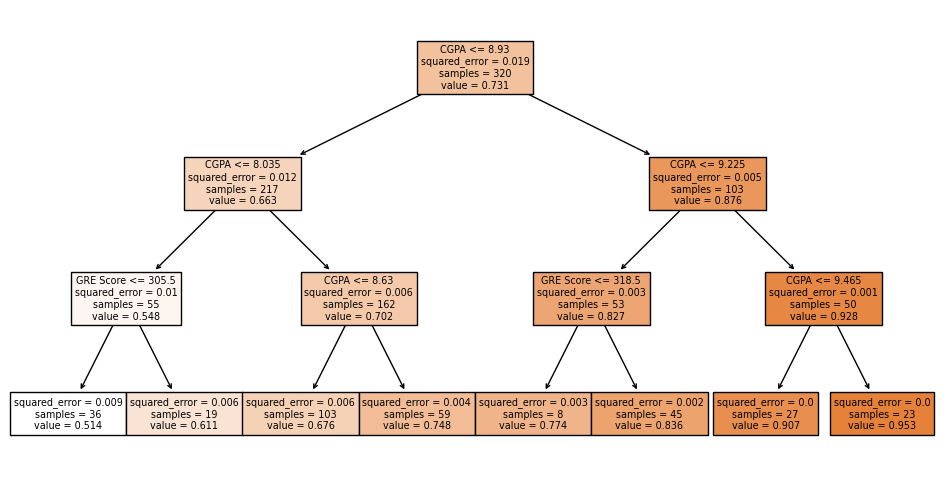

In [25]:
# plot tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
feature_names = X.columns.tolist()  # Convert the index to a list

final = DecisionTreeRegressor(max_depth=3, random_state=2529)
final.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(final, feature_names=feature_names, filled=True)
plt.show()


# **Save Model**

In [26]:
# save model
import pickle

# create an iterator object with write permission - model.pickle
with open('dtr_pkl', 'wb') as files:
    pickle.dump(best, files)

# load saved model
with open('dtr_pkl' , 'rb') as f:
    dtr2 = pickle.load(f)
    
# predict with saved model
dtr2.predict(X_test)

In [31]:
import pickle

# Load the saved model
with open('dtr_pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can inspect the loaded model or access its attributes and methods
print(loaded_model)


Pipeline(steps=[('model',
                 DecisionTreeRegressor(max_depth=3, random_state=2529))])
